In [2]:
import tensorflow as tf
import numpy as np
import scipy
from scipy import misc
import glob
from PIL import Image
import os
import matplotlib.pyplot as plt
import librosa
from tensorflow.keras import layers
from tensorflow.keras.layers import (Input, Add, Dense, Dropout, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D)
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing import image
#import pydot
from tensorflow.python.keras.utils import layer_utils
from IPython.display import SVG
from tensorflow.python.keras.utils.vis_utils import model_to_dot
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import glorot_uniform
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
#from pydub import AudioSegment
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random

In [2]:
genres =  'pop rock metal hiphop reggae disco blues country classical'
genres = genres.split()

In [9]:
#Now we have our complete data so, we need to split the data into training set and validation set.

# directory = 'C:/Users/PARTH/Desktop/be project/GTZAN DATASET/archive/Data/spectrograms3sec/train/'
# directory2 = 'C:/Users/PARTH/Desktop/be project/GTZAN DATASET/archive/Data/spectrograms3sec/test/'

# for g in genres:
#   filenames = os.listdir(os.path.join(directory,f"{g}"))
#   random.shuffle(filenames)
#   test_files = filenames[0:100]


#   for f in test_files:
#     shutil.move(directory + f"{g}"+ "/" + f,directory2 + f"{g}")

    


In [10]:
##create data generators for both training and testing set

train_dir = 'C:/Users/PARTH/Desktop/be project/GTZAN DATASET/archive/Data/spectrograms3sec/train/'
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(288,432),color_mode="rgba",class_mode='categorical',batch_size=128)

validation_dir = 'C:/Users/PARTH/Desktop/be project/GTZAN DATASET/archive/Data/spectrograms3sec/test/'
vali_datagen = ImageDataGenerator(rescale=1./255)
vali_generator = vali_datagen.flow_from_directory(validation_dir,target_size=(288,432),color_mode='rgba',class_mode='categorical',batch_size=128)


Found 8100 images belonging to 9 classes.
Found 900 images belonging to 9 classes.


In [11]:
def GenreModel(input_shape = (288,432,4),classes=9):
  
  X_input = Input(input_shape)

  X = Conv2D(8,kernel_size=(3,3),strides=(1,1))(X_input)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((2,2))(X)
  
  X = Conv2D(16,kernel_size=(3,3),strides = (1,1))(X)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((2,2))(X)
  
  X = Conv2D(32,kernel_size=(3,3),strides = (1,1))(X)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((2,2))(X)

  X = Conv2D(64,kernel_size=(3,3),strides=(1,1))(X)
  X = BatchNormalization(axis=-1)(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((2,2))(X)
  
  X = Conv2D(128,kernel_size=(3,3),strides=(1,1))(X)
  X = BatchNormalization(axis=-1)(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((2,2))(X)

  X = Conv2D(256,kernel_size=(3,3),strides=(1,1))(X)
  X = BatchNormalization(axis=-1)(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((2,2))(X)

  
  X = Flatten()(X)
  
  X = Dropout(0.3)(X)

  X = Dense(classes, activation='softmax', name='fc' + str(classes))(X)

  model = Model(inputs=X_input,outputs=X,name='GenreModel')

  return model

In [12]:
import tensorflow.keras.backend as K
def get_f1(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val
  
model = GenreModel(input_shape=(288,432,4),classes=9)
opt = Adam(learning_rate=0.0005)
model.compile(optimizer = opt,loss='categorical_crossentropy',metrics=['accuracy',get_f1]) 
model.fit_generator(train_generator,epochs=100,validation_data=vali_generator)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 64 steps, validate for 8 steps
Epoch 1/100
64/64 [==============================] - 219s 3s/step - loss: 1.4687 - accuracy: 0.4769 - get_f1: 0.4195 - val_loss: 2.6311 - val_accuracy: 0.1111 - val_get_f1: 0.0000e+00
Epoch 2/100
64/64 [==============================] - 123s 2s/step - loss: 0.7252 - accuracy: 0.7226 - get_f1: 0.7148 - val_loss: 3.7167 - val_accuracy: 0.1111 - val_get_f1: 0.0977
Epoch 3/100
64/64 [==============================] - 131s 2s/step - loss: 0.5314 - accuracy: 0.7980 - get_f1: 0.7959 - val_loss: 4.4799 - val_accuracy: 0.1444 - val_get_f1: 0.1260
Epoch 4/100
64/64 [==============================] - 127s 2s/step - loss: 0.4323 - accuracy: 0.8443 - get_f1: 0.8418 - val_loss: 4.4651 - val_accuracy: 0.2078 - val_get_f1: 0.1901
Epoch 5/100
64/64 [==============================] - 123s 2s/step - loss: 0.3348 - accuracy: 0.8835 - get_f1:

Epoch 88/100
64/64 [==============================] - 51s 794ms/step - loss: 0.0089 - accuracy: 0.9975 - get_f1: 0.9976 - val_loss: 0.6031 - val_accuracy: 0.8567 - val_get_f1: 0.8741
Epoch 89/100
64/64 [==============================] - 50s 789ms/step - loss: 0.0062 - accuracy: 0.9981 - get_f1: 0.9982 - val_loss: 0.3485 - val_accuracy: 0.9167 - val_get_f1: 0.9262
Epoch 90/100
64/64 [==============================] - 52s 813ms/step - loss: 0.0087 - accuracy: 0.9972 - get_f1: 0.9972 - val_loss: 0.5069 - val_accuracy: 0.8867 - val_get_f1: 0.9011
Epoch 91/100
64/64 [==============================] - 51s 789ms/step - loss: 0.0061 - accuracy: 0.9981 - get_f1: 0.9982 - val_loss: 0.2681 - val_accuracy: 0.9289 - val_get_f1: 0.9373
Epoch 92/100
64/64 [==============================] - 51s 801ms/step - loss: 0.0059 - accuracy: 0.9983 - get_f1: 0.9983 - val_loss: 0.3024 - val_accuracy: 0.9267 - val_get_f1: 0.9053
Epoch 93/100
64/64 [==============================] - 50s 784ms/step - loss: 0.0062 -

In [2]:
import tensorflow.keras.backend as K
def get_f1(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [14]:
model.save("cnn_audio_classification.model", save_format="h5")

In [3]:
from tensorflow.python.keras.models import load_model

In [4]:
audio_cnn = load_model('cnn_audio_classification.model',custom_objects={'get_f1':get_f1})

In [5]:
%matplotlib inline
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

In [17]:
audio_cnn.history.history.keys()

AttributeError: 'Model' object has no attribute 'history'

In [6]:
img1 = image.load_img(r'C:\Users\PARTH\Desktop\be project\GTZAN DATASET\archive\Data\spectrograms3sec\train\pop\pop34.png',color_mode='rgba', target_size=(288,432,4))
img = image.img_to_array(img1)
img = img/255

In [7]:
img = np.expand_dims(img, axis=0)
img.shape

(1, 288, 432, 4)

In [8]:
prediction = audio_cnn.predict(img, batch_size=None,steps=1) 

In [9]:
genres_ordered =  'blues classical country disco hiphop metal pop reggae rock'

In [10]:
genres_ordered_prediction=genres_ordered.split(" ")

In [11]:
print(np.where(np.max(prediction)))

(array([0], dtype=int64),)


## Order of Genres in Prediction Array 
### genres =  'blues classical country disco hiphop metal pop reggae rock'

In [12]:
prediction

array([[2.3239183e-17, 1.3086770e-06, 5.9925078e-15, 2.4653521e-10,
        1.3923521e-09, 1.0794484e-11, 9.9999785e-01, 6.6692562e-15,
        8.8058141e-07]], dtype=float32)

In [13]:
print(f'The predicted genre of the song is : {genres_ordered_prediction[np.argmax(prediction)]}')

The predicted genre of the song is : pop


## Building a GUI

#### Using Streamlit library for uploading and handling audio data

In [2]:
from PIL import Image 
import librosa
import numpy as np
import librosa.display
from pydub import AudioSegment
import matplotlib.cm as cm 
from matplotlib.colors import Normalize

In [35]:
file = r"C:\Users\PARTH\numb.mp3"
def convert_mp3_to_wav(music_file):  
    sound = AudioSegment.from_mp3(music_file)      
    sound.export("music_file.wav",format="wav")


    
def extract(wav_file,t1,t2):  
  wav = AudioSegment.from_wav(wav_file)  
  wav = wav[1000*t1:1000*t2]  
  wav.export("extracted.wav",format='wav')

def create_melspectrogram(wav_file):  
  y,sr = librosa.load(wav_file,duration=3)  
  mels = librosa.feature.melspectrogram(y=y,sr=sr)    
  fig = plt.Figure()  
  canvas = FigureCanvas(fig) 
  p = plt.imshow(librosa.power_to_db(mels,ref=np.max))   
  plt.savefig('melspectrogram.png')
    

    

In [31]:
from tensorflow.keras.preprocessing import image as IM
def predict(image_data,model):   
  image = IM.img_to_array(image_data)   
  image = np.reshape(image,(1,288,432,4))   
  prediction = model.predict(image/255)   
  prediction = prediction.reshape((9,))     
  class_label = np.argmax(prediction)     
  return class_label,prediction
class_labels = ['blues', 'classical', 'country', 'disco', 'hiphop', 'metal', 'pop', 'reggae', 'rock']



In [48]:
extract("kimi.wav",130,150)   

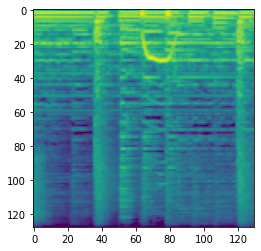

In [49]:
create_melspectrogram("extracted.wav") 

In [50]:
image_data =   image.load_img('melspectrogram.png',color_mode='rgba',target_size=(288,432))

In [51]:
class_label,prediction = predict(image_data,audio_cnn) 

In [52]:
prediction

array([3.8768471e-07, 7.1121434e-08, 9.9948186e-01, 3.0397251e-04,
       1.0101072e-14, 7.4726917e-12, 1.1509552e-09, 2.1367404e-04,
       1.4001442e-07], dtype=float32)

In [53]:
print("## The Genre of Song is "+class_labels[class_label])

## The Genre of Song is country


In [65]:
tf.__version__

'2.1.0'

## GUI BUILD

In [31]:
file = "pass.mp3"
import subprocess

In [32]:
def convert_mp3_to_wav(music_file):  
#     sound = AudioSegment.from_mp3(music_file)      
#     sound.export("music_file.wav",format="wav")
    subprocess.call(['ffmpeg', '-i', music_file,'music_file.wav'])

In [33]:
def extract(wav_file,t1,t2):  
  wav = AudioSegment.from_wav(wav_file)  
  wav = wav[1000*t1:1000*t2]  
  wav.export("extractedtest.wav",format='wav')

In [34]:
def create_melspectrogram(wav_file):  
  y,sr = librosa.load(wav_file,duration=3)  
  mels = librosa.feature.melspectrogram(y=y,sr=sr)    
  fig = plt.Figure()  
  canvas = FigureCanvas(fig) 
  p = plt.imshow(librosa.power_to_db(mels,ref=np.max))   
  plt.savefig('melspectrogramtest.png')

In [35]:
from tensorflow.keras.preprocessing import image as IM
def predict(image_data,model):   
  image = IM.img_to_array(image_data)   
  image = np.reshape(image,(1,288,432,4))   
  prediction = model.predict(image/255)   
  prediction = prediction.reshape((9,))     
  class_label = np.argmax(prediction)     
  return class_label,prediction
class_labels = ['blues', 'classical', 'country', 'disco', 'hiphop', 'metal', 'pop', 'reggae', 'rock']


## The Genre of Song is classical


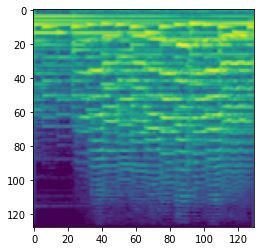

In [36]:
if file is None:  
  print("Please upload an mp3 file")
else:  
  convert_mp3_to_wav(file)  
  extract("music_file.wav",40,50)   
  create_melspectrogram("extracted.wav")   
  image_data =   image.load_img('melspectrogram.png',color_mode='rgba',target_size=(288,432))
  class_label,prediction = predict(image_data,audio_cnn)   
  print("## The Genre of Song is "+class_labels[class_label])

TypeError: Image data of dtype object cannot be converted to float

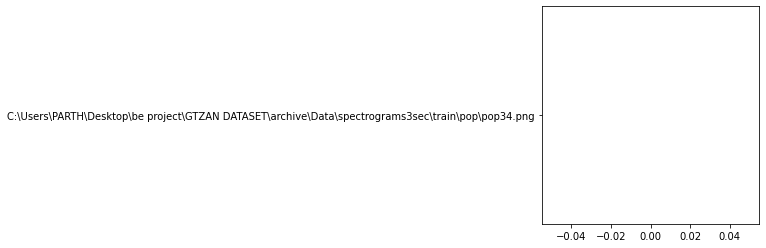

In [4]:
p1=plt.plot(r'C:\Users\PARTH\Desktop\be project\GTZAN DATASET\archive\Data\spectrograms3sec\train\pop\pop34.png')
plt.imshow(p1)